In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [28]:
data=pd.read_pickle('finaldata.pkl')
sns_count_data=pd.read_pickle('sns_totic_count_data').reset_index()[['DATE','topic']]

In [50]:
len(set(data['DONG_CD']))

36

In [30]:
fi_data=data.merge(sns_count_data,right_on='DATE',left_on='STD_DD',how='inner')

In [32]:
del fi_data['DATE']

In [38]:
fi_data[:10]

,STD_DD,GU_CD,DONG_CD,SEX_CD,AGE_CD,MCT_CAT_CD,USE_CNT,USE_AMT,AMTperCNT,pm_class_today,pm_class_yesterday,time_fp_sum,time_fp_mean,topic
0,2018-04-02,노원구,공릉1동,F,20,가전,4,112,28.000000,2.0,2.0,201793.73,20179.373,1974
1,2018-04-02,노원구,공릉1동,F,20,레저업소,35,124,3.542857,2.0,2.0,201793.73,20179.373,1974
2,2018-04-02,노원구,공릉1동,F,20,문화취미,9,799,88.777778,2.0,2.0,201793.73,20179.373,1974
3,2018-04-02,노원구,공릉1동,F,20,보건위생,9,66,7.333333,2.0,2.0,201793.73,20179.373,1974
4,2018-04-02,노원구,공릉1동,F,20,서적문구,4,13,3.250000,2.0,2.0,201793.73,20179.373,1974
5,2018-04-02,노원구,공릉1동,F,20,요식업소,583,6492,11.135506,2.0,2.0,201793.73,20179.373,1974
6,2018-04-02,노원구,공릉1동,F,20,유통업,911,3742,4.107574,2.0,2.0,201793.73,20179.373,1974
7,2018-04-02,노원구,공릉1동,F,20,음료식품,74,420,5.675676,2.0,2.0,201793.73,20179.373,1974
8,2018-04-02,노원구,공릉1동,F,20,의료기관,105,791,7.533333,2.0,2.0,201793.73,20179.373,1974
9,2018-04-02,노원구,공릉1동,F,20,의복,18,426,23.666667,2.0,2.0,201793.73,20179.373,1974


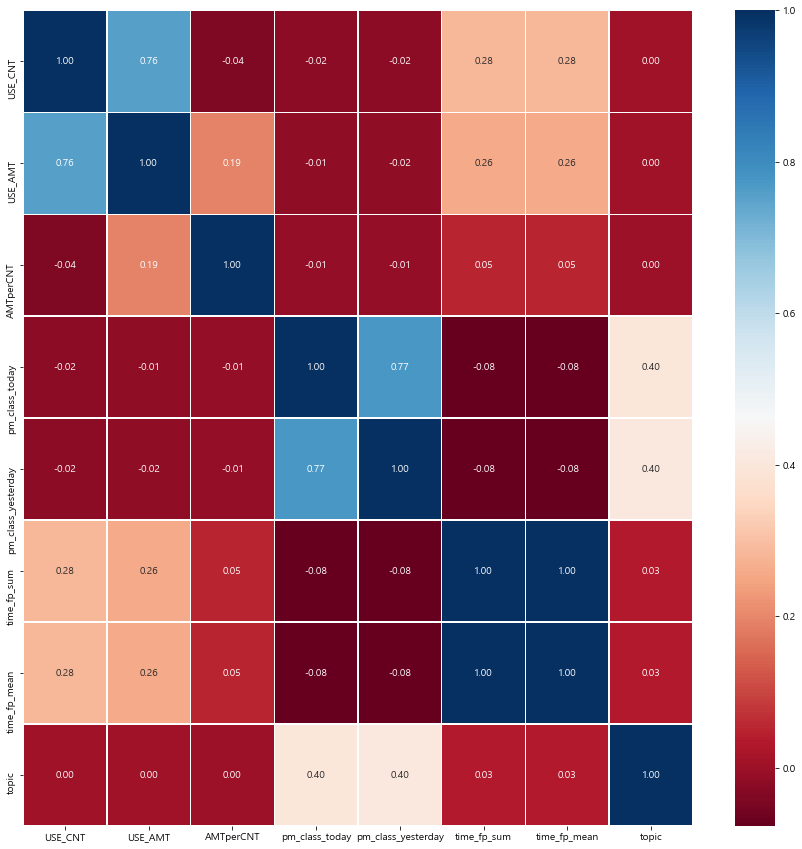

In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  
plt.figure(figsize=(15,15))
sns.heatmap(data = fi_data.set_index(['GU_CD','DONG_CD','STD_DD']).corr(method = 'pearson'), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

In [42]:
del fi_data['SEX_CD'],fi_data['AGE_CD']

In [68]:

hi_data=fi_data.groupby(['DONG_CD','STD_DD','MCT_CAT_CD']).sum()['AMTperCNT'].unstack(2).fillna(0).groupby(['DONG_CD']).mean()

In [45]:
scaler=StandardScaler()
scaler.fit(fi_data.set_index(['GU_CD','DONG_CD','STD_DD','MCT_CAT_CD']))
x1=scaler.transform(fi_data.set_index(['GU_CD','DONG_CD','STD_DD','MCT_CAT_CD']))

In [46]:
x1[:10]

array([[-0.35097354, -0.31206858, -0.05492284,  0.64157357,  0.64393726,
         0.74413957,  0.74413957,  0.6968197 ],
       [-0.26374132, -0.31062452, -0.2466685 ,  0.64157357,  0.64393726,
         0.74413957,  0.74413957,  0.6968197 ],
       [-0.33690382, -0.22939634,  0.42157907,  0.64157357,  0.64393726,
         0.74413957,  0.74413957,  0.6968197 ],
       [-0.33690382, -0.31760413, -0.21695091,  0.64157357,  0.64393726,
         0.74413957,  0.74413957,  0.6968197 ],
       [-0.35097354, -0.32398205, -0.24896452,  0.64157357,  0.64393726,
         0.74413957,  0.74413957,  0.6968197 ],
       [ 1.27829919,  0.45568815, -0.18714162,  0.64157357,  0.64393726,
         0.74413957,  0.74413957,  0.6968197 ],
       [ 2.20127234,  0.12475853, -0.24224108,  0.64157357,  0.64393726,
         0.74413957,  0.74413957,  0.6968197 ],
       [-0.15399756, -0.27500446, -0.22994706,  0.64157357,  0.64393726,
         0.74413957,  0.74413957,  0.6968197 ],
       [-0.06676534, -0.23035905

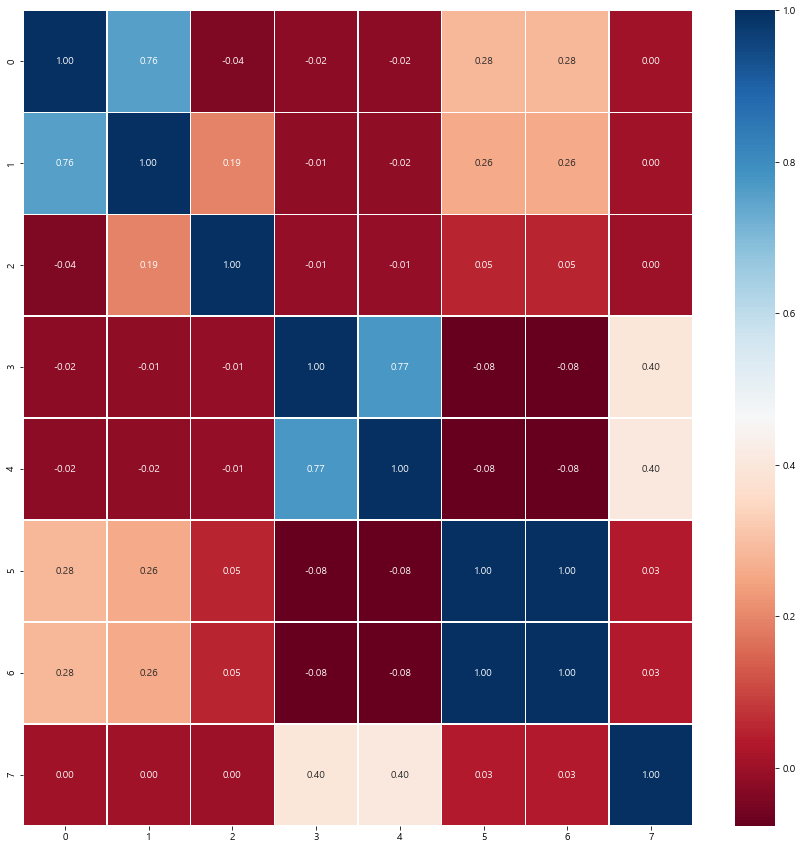

In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  
plt.figure(figsize=(15,15))
sns.heatmap(data = data_for_corr.corr(method = 'pearson'), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

In [110]:
hi_data[:23]

MCT_CAT_CD,가전,레저업소,레저용품,문화취미,보건위생,서적문구,숙박,연료판매,요식업소,유통업,음료식품,의료기관,의복
DONG_CD,,,,,,,,,,,,,
가회동,19.606883,394.736609,9.131385,243.223521,644.384068,271.561285,1894.798466,0.000000,456.292323,187.713520,276.920642,445.886528,797.490978
공릉1동,2635.935056,942.290215,863.173798,274.460980,734.292069,259.365455,375.822467,776.411344,474.992596,207.980914,304.740502,851.236644,533.133151
공릉2동,9.204795,574.691184,254.724362,222.047265,460.891520,280.349395,26.938387,812.782881,298.256537,207.699398,223.335781,892.040470,235.273171
교남동,50.281507,361.330070,88.648919,22.550731,458.163839,45.254794,56.306224,0.000000,379.979858,160.373305,215.527407,1661.418422,266.830497
무악동,0.000000,82.774828,0.000000,5.797260,910.336196,12.533005,26.478980,0.000000,322.583529,192.882010,146.333118,2530.034386,3.278978
부암동,0.000000,112.035300,73.674542,138.003866,257.685283,126.645959,23.564581,645.903957,624.106037,134.675337,290.628476,938.873618,606.244898
사직동,78.921781,1060.756004,183.458689,381.817173,807.894394,543.185103,2663.097341,439.979376,462.126521,238.833289,251.828470,563.536004,1046.222311
삼청동,91.740518,1.638356,338.988406,571.119888,455.461897,118.434761,28.584033,0.000000,407.495320,200.878976,340.813939,415.224578,1094.880822
상계10동,170.860061,301.961475,59.482316,9.399041,504.501787,237.952702,0.000000,0.000000,283.853643,164.890940,133.362172,596.284873,344.063432


In [48]:
data_for_corr=pd.DataFrame(x1)

In [67]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [77]:
merge = linkage(hi_data, method='complete')

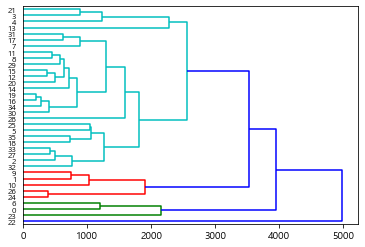

In [78]:
ax = plt.subplot(111)
dendrogram(merge, leaf_font_size=8, orientation='right')
# ax.set_xlim(xmin=0.03)
# ax.set_xscale('log')
plt.show()

In [92]:
dendrogram.labels_

AttributeError: 'function' object has no attribute 'labels_'

In [93]:
R = dendrogram(
                merge,
                truncate_mode='lastp',  # show only the last p merged clusters
                p=4,  # show only the last p merged clusters
                no_plot=True,
                )

In [94]:
R

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 3531.0904071201644, 3531.0904071201644, 0.0],
  [0.0, 3961.3173139507203, 3961.3173139507203, 3531.0904071201644],
  [0.0, 4987.821229351973, 4987.821229351973, 3961.3173139507203]],
 'ivl': ['22', '(3)', '(5)', '(27)'],
 'leaves': [22, 65, 64, 67],
 'color_list': ['b', 'b', 'b']}

In [112]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(merge)[23]

3